In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data files and rename the columns to shorter names
col_names = ['facidity', 'vacidity', 'citric', 'sugar', 'chlorides', 'fsulfur', 'sulfur', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
red_wine_data = pd.read_csv('./data/winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('./data/winequality-white.csv', sep=';')
red_wine_data.columns = col_names

In [3]:
# Adding a column marking whether wine is good or not
red_wine_data['good']=(red_wine_data['quality']>=7).apply(lambda x: 1 if x else -1)
col_names = np.append(col_names, 'good')
print('Number of good wines: {}'.format(red_wine_data['good'].value_counts()[1]))
print('Number of not good wines: {}'.format(red_wine_data['good'].value_counts()[-1]))

Number of good wines: 217
Number of not good wines: 1382


<AxesSubplot:>

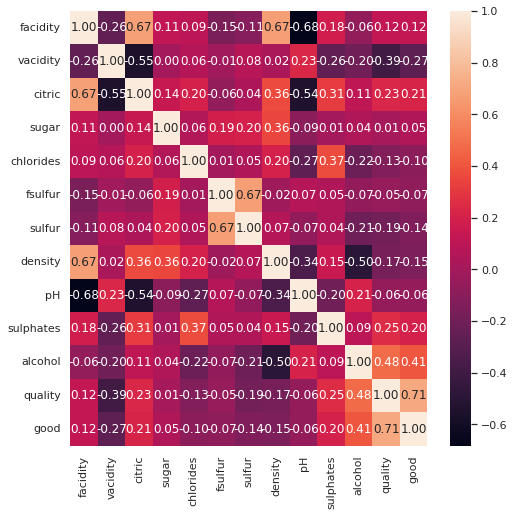

In [4]:
# Heatmap of feature correlations
corr = red_wine_data.corr()
sns.set(rc={"figure.figsize": (8, 8)})
sns.heatmap(corr, annot=True, fmt=".2f")

In [5]:
# Remove the quality column ffrom the data set
del red_wine_data['quality']

In [6]:
red_wine_data.head()

,facidity,vacidity,citric,sugar,chlorides,fsulfur,sulfur,density,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,-1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1


In [7]:
red_wine_data.describe()

,facidity,vacidity,citric,sugar,chlorides,fsulfur,sulfur,density,pH,sulphates,alcohol,good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,-0.728580
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.685175
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,-1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,-1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,-1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,-1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [8]:
# Leave out some features and convert into numpy array
DROP_COLS = False
T = 0.5
cols_to_drop = ['facidity', 'density', 'vacidity']
red_wine_data_d = red_wine_data
if DROP_COLS: red_wine_data_d = red_wine_data.drop(columns=cols_to_drop)

X = red_wine_data_d.to_numpy()[:,:-1]
y = red_wine_data_d.to_numpy()[:,-1]

--- Fold 1 ---
Train accuracy: 0.8733385457388585
Test accuracy: 0.865625
Train f1: 0.4705882352941177
Test f1: 0.4556962025316456
--------------

--- Fold 2 ---
Train accuracy: 0.8678655199374511
Test accuracy: 0.8875
Train f1: 0.321285140562249
Test f1: 0.5384615384615384
--------------

--- Fold 3 ---
Train accuracy: 0.872556684910086
Test accuracy: 0.875
Train f1: 0.4072727272727273
Test f1: 0.25925925925925924
--------------

--- Fold 4 ---
Train accuracy: 0.8647380766223612
Test accuracy: 0.90625
Train f1: 0.3663003663003663
Test f1: 0.5454545454545454
--------------

--- Fold 5 ---
Train accuracy: 0.8640625
Test accuracy: 0.8808777429467085
Train f1: 0.44230769230769224
Test f1: 0.4571428571428572
--------------

Train f1 mean: 0.4015508323474305
Test f1 mean: 0.45120288056996916
Accuracy train mean: 0.8685122654417514
Accuracy test mean: 0.8830505485893416


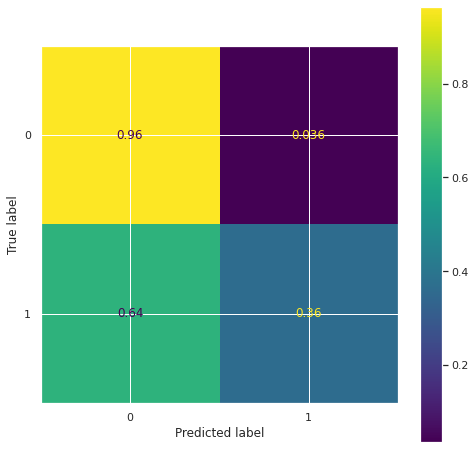

In [9]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

logreg = make_pipeline(StandardScaler(), LogisticRegression(penalty='none'))

kf = KFold(shuffle=True)
f1_test = []
f1_train = []
acc_test = []
acc_train = []
i = 0
conf = np.zeros((2,2))

for train_index, test_index in kf.split(X):
    i += 1
    X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]
    logreg.fit(X_test, y_test)
    y_pred_train = logreg.predict(X_train)
    y_pred_test = logreg.predict(X_test)
    f1_train.append(f1_score(y_train, y_pred_train))
    f1_test.append(f1_score(y_test, y_pred_test))
    acc_test.append(logreg.score(X_test, y_test))
    acc_train.append(logreg.score(X_train, y_train))
    conf += confusion_matrix(y_test, y_pred_test, normalize='true')
    print('--- Fold {} ---'.format(i))
    print('Train accuracy: {}\nTest accuracy: {}'.format(acc_train[-1], acc_test[-1]))
    print('Train f1: {}'.format(f1_train[-1]))
    print('Test f1: {}'.format(f1_test[-1]))
    print('--------------\n')

print('Train f1 mean: {}\nTest f1 mean: {}\nAccuracy train mean: {}\nAccuracy test mean: {}'.format(
    np.mean(f1_train), 
    np.mean(f1_test), 
    np.mean(acc_train),
    np.mean(acc_test)))    

ConfusionMatrixDisplay(conf/5).plot()